In [1]:
import tespa
import numpy as np
import matplotlib.pyplot as plt

# Create a TesPa object
sim = tespa.TesPa()
# Tell the object where to load the EMSES files
sim.load_emses("../data/sub_vx_fp_magz_small", 0.0025)

print(np.mean(sim.data.Ex))
# If B is constant it must we set manually as EMSES data does not write it
#sim.set_B(10e-6,dir="z")
sim.set_E(-1e-4,dir="z", gradient=(1,0.0), gradient_extent=(0.2))

# Print some info about the simulation
print(sim)
Np = 100
r = 3.5e-6
qe = -1.6e-19

Lx = 0.8
Ly = 0.8
Lz = 0.8

ms = np.ones((Np))*r**3 # Particle mass
qs = np.ones((Np))*1e4*qe # Particle charge
r0s = np.ones((3,Np))
np.random.seed(0)
for i in range(Np):
    # Initial position in m
    r0s[0,i] = np.random.rand()*Lx*0.001 + 0.5*Lx #random position
    r0s[1,i] = np.random.rand()*Lx*0.001 + 0.5*Lx #random position
    r0s[2,i] = 0.4  #z position
v0s = np.zeros((3,Np)) # Initial speed in m/s
dt0 = 1e-3 # Inital time step for the adaptive time step method

Loading data from  ../data/sub_vx_fp_magz_small
8.308711e-11
Data loaded from ../data/sub_vx_fp_magz_small 
Dimensions in meters (x,y,z): (0.8, 0.8, 0.8) with dx = 0.0025


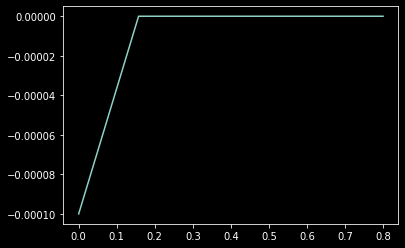

In [2]:
plt.plot(sim.data.z,sim.data.Ez[0,0,:])

In [3]:


sim.run_dust(r0s,v0s,ms,qs,aG=-1.62,Nt = 5000,dt0=1e-4, rdust = r)

Running simulation
1
r =  [0.40023778 0.40073529 0.39999999]
2
r =  [0.40023778 0.40073529 0.39999998]
3
r =  [0.40023778 0.40073529 0.39999998]
4
r =  [0.40023778 0.40073529 0.39999997]
5
r =  [0.40023778 0.40073529 0.39999996]
6
r =  [0.40023778 0.40073529 0.39999995]
7
r =  [0.40023778 0.40073529 0.39999994]
8
r =  [0.40023778 0.40073529 0.39999994]
9
r =  [0.40023778 0.40073529 0.39999993]
10
r =  [0.40023778 0.40073529 0.39999992]
11
r =  [0.40023778 0.40073529 0.39999991]
12
r =  [0.40023778 0.40073529 0.3999999 ]
13
r =  [0.40023778 0.40073529 0.39999989]
14
r =  [0.40023778 0.40073529 0.39999989]
15
r =  [0.40023778 0.40073529 0.39999988]
16
r =  [0.40023778 0.40073529 0.39999987]
17
r =  [0.40023778 0.40073529 0.39999986]
18
r =  [0.40023778 0.40073529 0.39999985]
19
r =  [0.40023778 0.40073529 0.39999985]
20
r =  [0.40023778 0.40073529 0.39999984]
21
r =  [0.40023778 0.40073529 0.39999983]
22
r =  [0.40023778 0.40073529 0.39999982]
23
r =  [0.40023778 0.40073529 0.39999981]
2

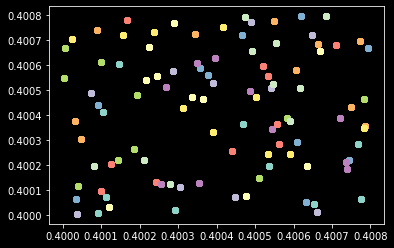

In [4]:

for i in range(Np):
    plt.scatter(sim.r[0,i,:],sim.r[1,i,:]) 

0.3999989307999995


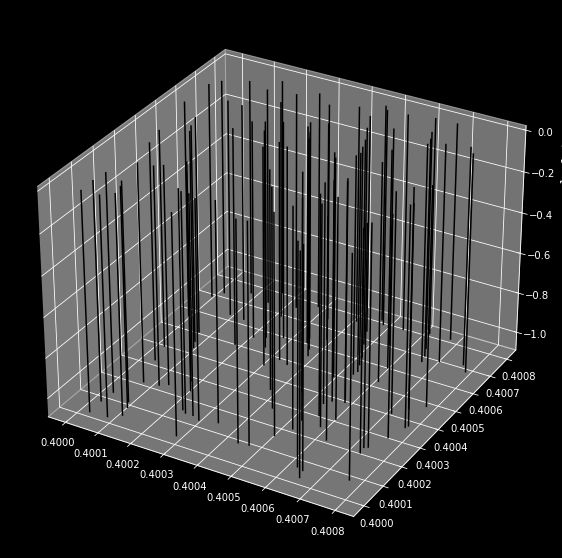

In [5]:


ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

for i in range(Np):

    ax.plot(sim.r[0,i,:],sim.r[1,i,:],sim.r[2,i,:], color = 'black')
print(sim.r[2,0,-1])
plt.show()